# PyroAId 🚨🔥

Oscar Poblete Sáenz


# Import libraries

In [ ]:
!pip install ultralytics
!pip install roboflow

In [ ]:
import ultralytics  # Utilities for training computer vision models
from roboflow import Roboflow  # Download and Manipulation of Datasets from Roboflow
from ultralytics import YOLO  # YOLO implementation for model training
from IPython.display import Image  # Image Visualization in the Python Environment


# Initialize data set

In [ ]:
ROBOFLOW_KEY = "TOKEN_PLACEHOLDER"

In [ ]:
rf = Roboflow(api_key = ROBOFLOW_KEY)
source = rf.workspace("-jwzpw").project("continuous_fire")
dataset = source.version(6).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.222, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to continuous_fire-6 in yolov8:: 100%|██████████| 5030/5030 [00:00<00:00, 7424.69it/s]


# Train YOLOv8 model

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/continuous_fire-6/data.yaml epochs=80 imgsz=640 plots=True

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/continuous_fire-6/data.yaml, epochs=80, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, fo

# See training graphs

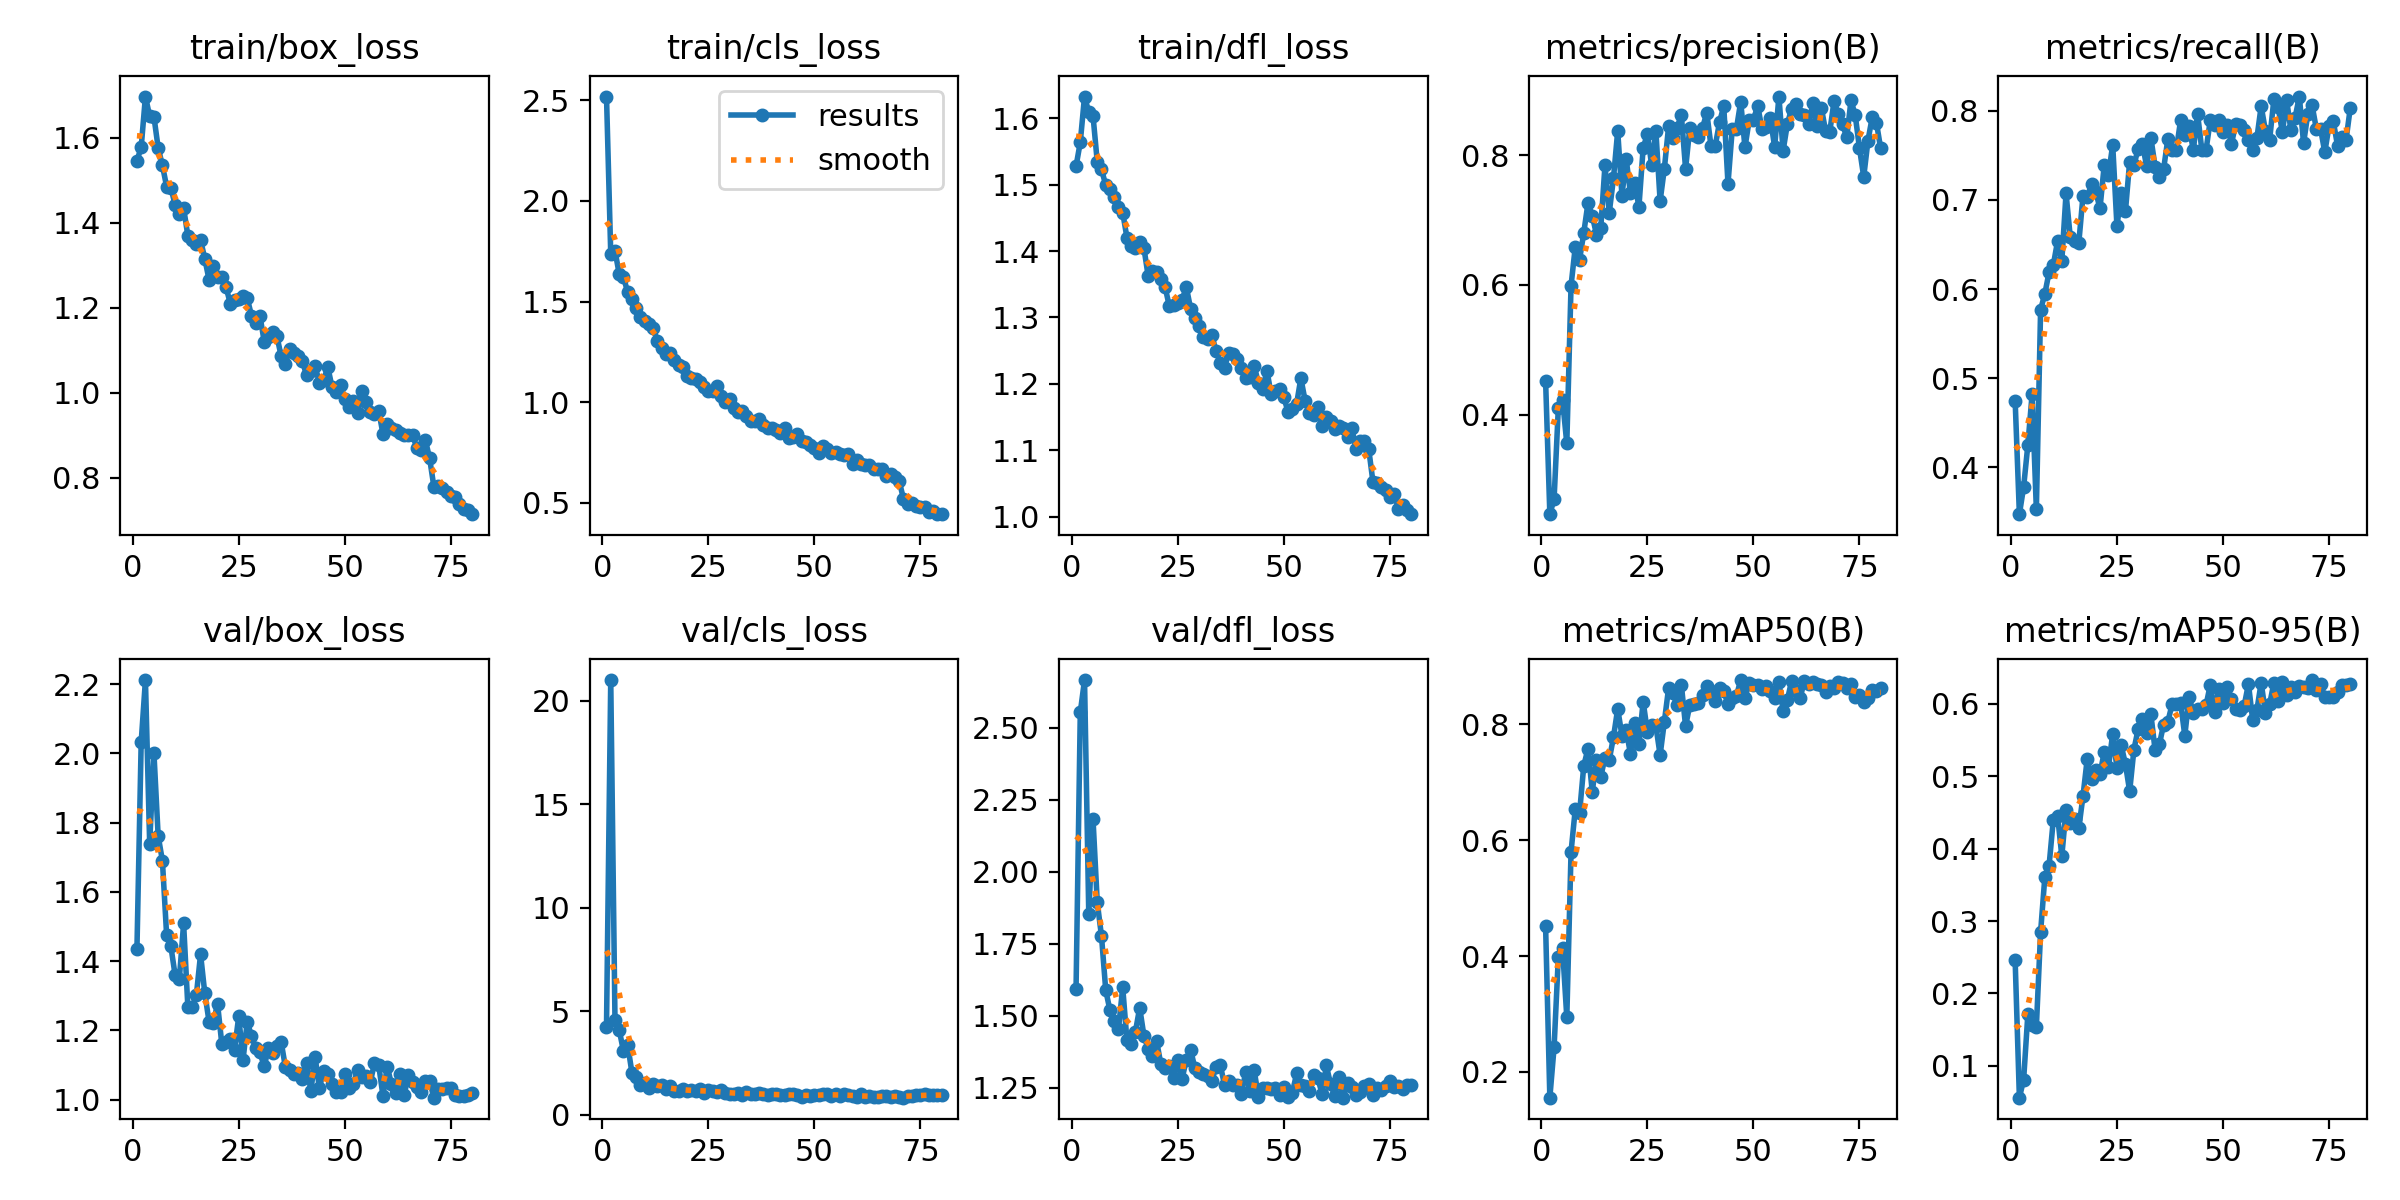

In [ ]:
Image(filename=f'/content/runs/detect/train3/results.png', width=600)

# Validate model

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data=/content/continuous_fire-6/data.yaml

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/continuous_fire-6/valid/labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100% 754/754 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 48/48 [00:12<00:00,  3.90it/s]
                   all        754        950      0.849      0.807      0.872      0.632
Speed: 0.8ms preprocess, 8.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val
